In [47]:
from keras.models import Sequential
"""Import from keras_preprocessing not from keras.preprocessing, because Keras may or maynot contain the features discussed here depending upon when you read this article, until the keras_preprocessed library is updated in Keras use the github version."""
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv("image_data.csv")
columns = list(df.columns)[1:]
datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [53]:
train_generator = datagen.flow_from_dataframe(
dataframe = df[:180],
directory = "/Users/michalgolovanevsky/SeniorProject/data/train/images",
x_col = "image",
y_col = columns,
batch_size = 5,
seed = 42,
shuffle = True,
class_mode = "other",
target_size = (100,100))

Found 180 validated image filenames.


In [55]:
valid_generator = test_datagen.flow_from_dataframe(
dataframe = df[180:200],
directory = "/Users/michalgolovanevsky/SeniorProject/data/train/images",
x_col="image",
y_col=columns,
batch_size=5,
seed=42,
shuffle=True,
class_mode="other",
target_size=(100,100))

"""
test_generator=test_datagen.flow_from_dataframe(
dataframe=df[180:200],
directory = "/Users/michalgolovanevsky/SeniorProject/data/test/images",
x_col="Image",
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(100,100))"""

Found 20 validated image filenames.


'\ntest_generator=test_datagen.flow_from_dataframe(\ndataframe=df[180:200],\ndirectory = "/Users/michalgolovanevsky/SeniorProject/data/test/images",\nx_col="Image",\nbatch_size=1,\nseed=42,\nshuffle=False,\nclass_mode=None,\ntarget_size=(100,100))'

In [56]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(66, activation='sigmoid'))
model.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
activation_21 (Activation)   (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 98, 98, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 49, 49, 64)        18496     
__________

In [59]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
36/36 [==============================] - 44s 1s/step - loss: 0.1205 - acc: 0.9529 - val_loss: 0.1360 - val_acc: 0.9538
Epoch 2/10
36/36 [==============================] - 36s 1s/step - loss: 0.1205 - acc: 0.9524 - val_loss: 0.1370 - val_acc: 0.9515
Epoch 3/10
36/36 [==============================] - 33s 927ms/step - loss: 0.1157 - acc: 0.9530 - val_loss: 0.1309 - val_acc: 0.9530
Epoch 4/10
36/36 [==============================] - 37s 1s/step - loss: 0.1149 - acc: 0.9528 - val_loss: 0.1352 - val_acc: 0.9500
Epoch 5/10
36/36 [==============================] - 35s 976ms/step - loss: 0.1098 - acc: 0.9573 - val_loss: 0.1309 - val_acc: 0.9508
Epoch 6/10
36/36 [==============================] - 34s 945ms/step - loss: 0.1063 - acc: 0.9546 - val_loss: 0.1343 - val_acc: 0.9508
Epoch 7/10
36/36 [==============================] - 34s 941ms/step - loss: 0.1031 - acc: 0.9586 - val_loss: 0.1317 - val_acc: 0.9500
Epoch 8/10
36/36 [==============================] - 33s 920ms/step - loss: 0.0

In [60]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

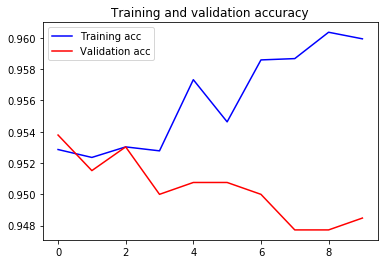

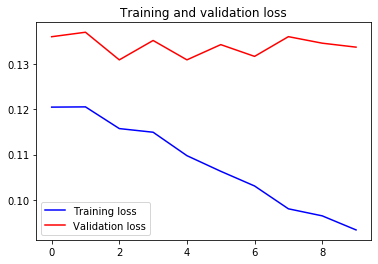

In [63]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
predictions = pred_bool.astype(int)
#columns=["desert", "mountains", "sea", "sunset", "trees"]
#columns should be the same order of y_col
results=pd.DataFrame(predictions, columns=columns)
results["Image"]=test_generator.filenames
ordered_cols=["Image"]+columns
results=results[ordered_cols]#To get the same column order

In [36]:
results

,Image,animal--bird,animal--ground-animal,construction--barrier--curb,construction--barrier--fence,construction--barrier--guard-rail,construction--barrier--other-barrier,construction--barrier--wall,construction--flat--bike-lane,construction--flat--crosswalk-plain,...,object--vehicle--caravan,object--vehicle--motorcycle,object--vehicle--on-rails,object--vehicle--other-vehicle,object--vehicle--trailer,object--vehicle--truck,object--vehicle--wheeled-slow,void--car-mount,void--ego-vehicle,void--unlabeled
0,2PLh06tpv0UV-HPc2IOmtA.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2RfwaKn8rVSFH2epy9rJqQ.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2SYCjMPdfq8X3v4dGugXwg.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2T2reH82rbd0z8gtmBekzg.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2TMdzF5LSFnehkHD1PWk5g.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2Xf-1_EcACysEa437Z21KA.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2_MHBTsYKK9t_-twwkyKag.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,2d3hvB1rNaivBLVcSYHREA.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,2dUUdESNqgXC2CW0gHWY7A.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,2e9PeGNj2wAj2RjSZGj-FA.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
